In [5]:
import pandas as pd
data = pd.read_csv('../data_train/stringtie_tss_labeled.csv')
print("StringTie TSS",data['label'].value_counts())
print("StringTie TSS",data['label'].value_counts(normalize=True))
data = pd.read_csv('../data_train/stringtie_tes_labeled.csv')
print("StringTie TES",data['label'].value_counts())
print("StringTie TES",data['label'].value_counts(normalize=True))
data = pd.read_csv('../data_train/isoquant_tss_labeled.csv')
print("IsoQuant TSS",data['label'].value_counts())
print("IsoQuant TSS",data['label'].value_counts(normalize=True))
data = pd.read_csv('../data_train/isoquant_tes_labeled.csv')
print("IsoQuant TES",data['label'].value_counts())
print("IsoQuant TES",data['label'].value_counts(normalize=True))
# print minimum 5 and maximum 5 delta coverage rows

# print(data.loc[data['delta_coverage'].idxmax(), ['chrom', 'position', 'delta_coverage']])
# print(data.loc[data['delta_coverage'].idxmin(), ['chrom', 'position', 'delta_coverage']])

# # print five chromosomes and positions with label 1
# print(data.loc[data['label'] == 1, ['chrom', 'position', 'delta_coverage']].sample(frac=1).head(5))
# print(data.columns)

StringTie TSS label
0    6851
1    5639
Name: count, dtype: int64
StringTie TSS label
0    0.548519
1    0.451481
Name: proportion, dtype: float64
StringTie TES label
0    6283
1    5265
Name: count, dtype: int64
StringTie TES label
0    0.544077
1    0.455923
Name: proportion, dtype: float64
IsoQuant TSS label
1    4162
0    2449
Name: count, dtype: int64
IsoQuant TSS label
1    0.629557
0    0.370443
Name: proportion, dtype: float64
IsoQuant TES label
1    3010
0    2929
Name: count, dtype: int64
IsoQuant TES label
1    0.506819
0    0.493181
Name: proportion, dtype: float64


In [7]:
import os
import pandas as pd
from glob import glob

# Paths
REPORTS_DIR = "../out/reports"
OUTPUT_MD = os.path.join(REPORTS_DIR, "metrics_summary.md")

# Model variants we expect in filenames
MODELS = ["xgboost", "randomforest"]
SITE_TYPES = ["tss", "tes"]
TOOLS = ["stringtie", "isoquant"]

results = []

# Search for all metrics summary files
for site_type in SITE_TYPES:
    for tool in TOOLS:
        for model in MODELS:
            path = os.path.join(REPORTS_DIR, site_type, f"{tool}_{model}_metrics_summary.txt")
            if not os.path.exists(path):
                print(f"⚠️ No metrics file found for {tool} {model} on {site_type}. Skipping.")
                continue

            metrics = {
                "Tool": tool,
                "Site Type": site_type,
                "Model": model
            }
            with open(path) as f:
                for line in f:
                    line = line.strip()
                    if line.startswith("confusion_matrix") or not line:
                        continue
                    if ":" in line:
                        key, value = line.split(":", 1)
                        key = key.strip().lower()
                        try:
                            metrics[key] = float(value.strip())
                        except ValueError:
                            continue
            results.append(metrics)

# Create markdown report
if results:
    df = pd.DataFrame(results)
    df = df[["Tool", "Site Type", "Model", "accuracy", "precision", "recall", "f1", "aupr", "auc"]]  # consistent order
    os.makedirs(REPORTS_DIR, exist_ok=True)
    with open(OUTPUT_MD, "w") as f:
        f.write("# Combined Model Evaluation Summary\n\n")
        f.write(df.to_markdown(index=False))
    print(f"✅ Markdown summary written to {OUTPUT_MD}")
else:
    print("⚠️ No metrics files found. Nothing to summarize.")


✅ Markdown summary written to ../out/reports/metrics_summary.md


TypeError: replace() takes at least 2 positional arguments (1 given)

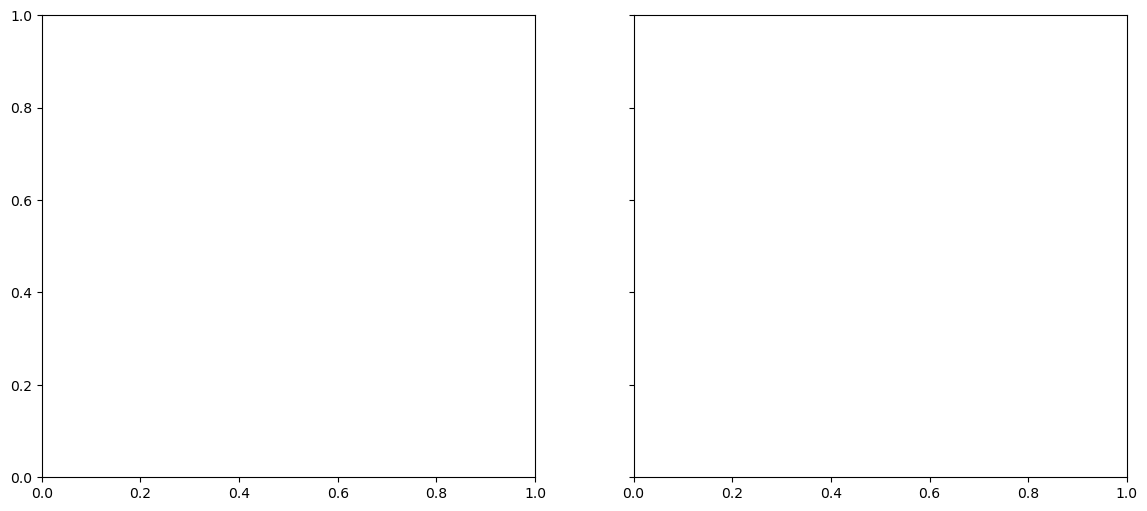

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

# Get PR curve data CSVs
tss_files = glob.glob("../out/plots/tss/*_pr_data.csv")
tes_files = glob.glob("../out/plots/tes/*_pr_data.csv")

# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot TSS
for file in tss_files:
    df = pd.read_csv(file)
    label = file.split("/")[-1].replace("_pr_curve_pr_data.csv", "").replace("_", " (").title()
    axs[0].plot(df["recall"], df["precision"], label=f"{label})")
axs[0].set_title("TSS PR Curves")
axs[0].set_xlabel("Recall")
axs[0].set_ylabel("Precision")
axs[0].legend()

# Plot TES
for file in tes_files:
    df = pd.read_csv(file)
    label = file.split("/")[-1].replace("_pr_curve_pr_data.csv", "").replace("_", " (").title()
    axs[1].plot(df["recall"], df["precision"], label=f"{label})")
axs[1].set_title("TES PR Curves")
axs[1].set_xlabel("Recall")
axs[1].set_ylabel("Precision")
axs[1].legend()

# Save and show
plt.tight_layout()
plt.savefig("../out/plots/pr_curves_tss_tes_subplots.png")
plt.show()


In [15]:
x = tss_files[0]
t = x.split("/")[-1].replace("_pr_curve_pr_data.csv", "").split("_")
print((t[0]  + " (" + t[1] + ")").title())

Isoquant (Randomforest)
